In [1]:
import numpy as np
import matplotlib.pyplot as plt

Consider the heat equation given by: 

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \nabla^2 T
\end{equation}

For a 2D system along the xy-plane, do the following assuming an initial temperature of 300K, $\alpha = 1$, and 100 $\times$ 100 grids. 
Calculate the transient and steady-state temperature profiles given the following boundary conditions: 
1. All boundaries are set to be 1000K
2. All boundaries are set to be 100K
3. The top and bottom boundaries arer 100K, while the left annd right boudaries are 1000K
4. The top boundary is set to be 1000K and the rest are insulating

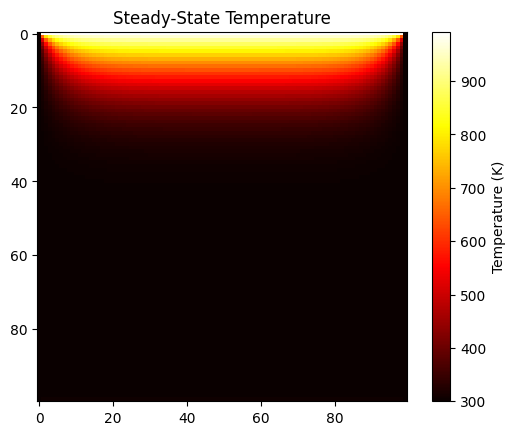

In [19]:
dx = 1 
dt = 0.2
iter_max = 10000
alpha = 0.05

#1 (All boundaries are se to be 1000K)
T = 300*np.ones((100,100)) #matrix where each element is 300
def set_1000k(arr): #set edges to 1000K
    arr[0,:] = 1000 #top
    arr[-1,:] = 300 #bottom
    arr[:, 0] = 300 #left
    arr[:,-1] = 300 #right
    return arr 
T = set_1000k(T) #now T is 300K everywhere except the edges, where it is 1000K

# You might want to record how the thing evolves, so collect the array for each iteration
T_evol = []

#finite difference
for i in range(iter_max):
    # Impose the boundary
    T = set_1000k(T)

    # Take the rolls (WRITE THE APPOPRIATE ARGUMENTS) 
    T_top = np.roll(T, +1, axis=0)
    T_bot = np.roll(T, -1, axis=0)
    T_left = np.roll(T, +1, axis=1)
    T_right = np.roll(T, -1, axis=1)
    
    # Apply central diff space, forward diff time.
    central_diff_space = alpha * (T_top + T_bot + T_left + T_right - (4*T))/(dx**2)
    forward_time = T + dt*(central_diff_space)

    # forward time becomes new T
    T = forward_time

    # collect the current state of T
    T_evol.append(T)

plt.imshow(T, cmap = "hot")
plt.colorbar(label = "Temperature (K)")
plt.title("Steady-State Temperature")
plt.show()

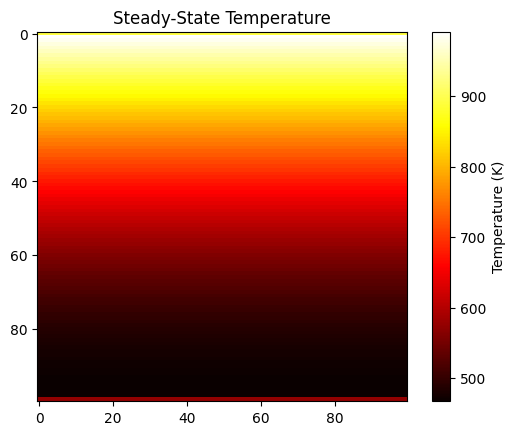

In [17]:
#Boundary 4
dx = 1 
dt = 0.2
iter_max = 10000
alpha = 1

#1 (All boundaries are se to be 1000K)
T = 300*np.ones((100,100)) #matrix where each element is 300
def set_1000k(arr): #set edges to 1000K
    arr[0,:] = 1000 #top
    arr[-1,:] = arr[-2,:] #bottom
    arr[:, 0] = arr[:, 1] #left
    arr[:,-1] = arr[:,-2] #right
    return arr 
T = set_1000k(T) #now T is 300K everywhere except the edges, where it is 1000K at the top and insulating everywhere else

# You might want to record how the thing evolves, so collect the array for each iteration
T_evol = []

#finite difference
for i in range(iter_max):
    # Impose the boundary
    T = set_1000k(T)

    # Take the rolls (WRITE THE APPOPRIATE ARGUMENTS) 
    T_top = np.roll(T, +1, axis=0)
    T_bot = np.roll(T, -1, axis=0)
    T_left = np.roll(T, +1, axis=1)
    T_right = np.roll(T, -1, axis=1)
    
    # Apply central diff space, forward diff time.
    central_diff_space = alpha * (T_top + T_bot + T_left + T_right - (4*T))/(dx**2)
    forward_time = T + dt*(central_diff_space)

    # forward time becomes new T
    T = forward_time

    # collect the current state of T
    T_evol.append(T)

plt.imshow(T, cmap = "hot")
plt.colorbar(label = "Temperature (K)")
plt.title("Steady-State Temperature")
plt.show()